# Pychenette n° 6 :  Enveloppe convexe du drapeau européen

**Pychenette** est une série de notebooks, en français, courts et originaux avec Python.

**Auteur** : Francis Wolinski

Pour tout commentaire : pychenette[at]yotta-conseil.fr

#### L'idée de ce notebook

Le drapeau européen est composé de 12 étoiles à 5 branches disposées régulièrement en cercle :

![image](https://style-guide.europa.eu/o/opportal-service/isg?resource=fr/../images/scan/5000100-1-petit.jpg)

Si l'on considère les 60 points qui correspondent aux 5 pointes de chacune des 12 étoiles, quelle est l'enveloppe convexe de cet ensemble de points ? Autrement dit, parmi ces 60 points, quels sont ceux qui définissent le plus petit polygone convexe contenant l'ensemble ?

<a href="notebooks/Pychenette-6-Enveloppe-convexe-du-drapeau-europeen.ipynb">Accès au notebook</a>

<a href="https://pychenette.yotta-conseil.fr/"><i class="fa fa-home"></i></a>

In [1]:
# imports
from numpy import array, cos, sin, pi
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from PIL import Image

### Spécifications techniques du drapeau européen

La page Wikipédia dédié à ce drapeau en donne les spécifications techniques :

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/EU_Flag_specification.svg/440px-EU_Flag_specification.svg.png)

Source: https://fr.wikipedia.org/wiki/Drapeau_europ%C3%A9en

Elle sont tirées du document officiel *Annexe A1 &ndash; Guide graphique de l’emblème européen* qui en donne une description géométrique :
> L’emblème est constitué par un rectangle bleu dont le battant a une fois et demie la longueur du guindant. Douze étoiles d’or s’alignent régulièrement le long d’un cercle non apparent, dont le centre est situé au point d’intersection des diagonales du rectangle. Le rayon de ce cercle est égal au tiers de la hauteur du guindant. Chacune des étoiles à cinq branches est construite dans un cercle non apparent, dont le rayon est égal à un dix­huitième de la hauteur du guindant. Toutes les étoiles sont disposées verticalement, c’est-à-dire avec une branche dirigée vers le haut et deux branches s’appuyant sur une ligne non apparente, perpendiculaire à la hampe.

https://style-guide.europa.eu/fr/content/-/isg/topic?identifier=annex-a1-graphics-guide-european-emblem

*Nota bene* : Le problème est non trivial car les 12 étoiles sont disposées verticalement.

### Affichage de l'ensemble de points

D'après les spécifications techniques, le grand cercle organisant les étoiles possède un rayon de $\frac{2}{3}$ et les petits cercles matérialisant les étoiles possèdent un rayon de $\frac{1}{9}$, où l'unité représente la demie-hauteur du drapeau.

On affiche les centres de étoiles en bleu et leurs pointes en jaune.

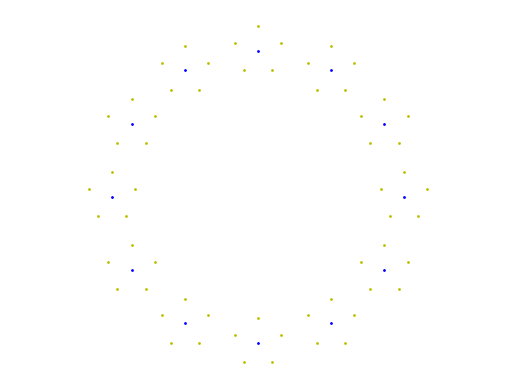

In [2]:
# radius
r1 = 2/3
r2 = 1/9

# centers of stars
points1 = [[r1*cos(pi*i/6), r1*sin(pi*i/6)] for i in range(12)]
points1 = array(points1)

# spikes of stars
points2 = [[r1*cos(pi*i/6) + r2*cos(2*pi*j/5 + pi/2), r1*sin(pi*i/6) + r2*sin(2*pi*j/5 + pi/2)]
           for i in range(12) for j in range(5)]
points2 = array(points2)

# plot
plt.scatter(points1[:,0], points1[:,1], s=1, c='b')
plt.scatter(points2[:,0], points2[:,1], s=1, c='y')
plt.axis('off')
plt.axis('equal')
plt.show()

### Application de l'algorithme *Quickhull*

L'algorithme *Quickhull* est implémenté dans la librairie **scipy**. Cet algorithme trouve rapidement l'enveloppe convexe en choisissant des points extrêmes et en divisant récursivement l’espace jusqu’à ce qu’il ne reste plus que des points sur le bord.

L'enveloppe convexe est formée de 17 points qui définissent un polygone irrégulier bien qu'ayant une symétrie verticale.

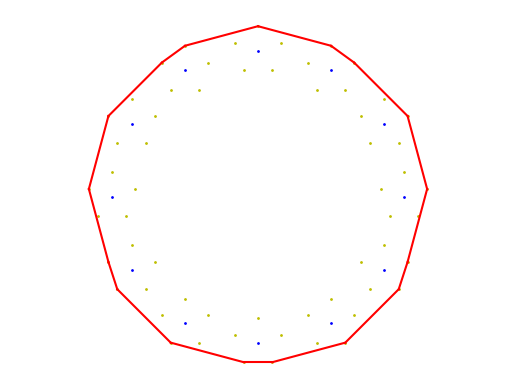

In [3]:
# Quickhull algorithm
hull = ConvexHull(points2)

# plot
plt.scatter(points1[:,0], points1[:,1], s=1, c='b')
plt.scatter(points2[:,0], points2[:,1], s=1, c='y')
for simplex in hull.simplices:
    plt.plot(points2[simplex, 0], points2[simplex, 1], 'r-')  # Tracer les arêtes de l'enveloppe
plt.axis('off')
plt.axis('equal')
plt.show()

### Superposition des points sur les spécifications techniques

Il est possible superposer les points obtenus sur une image représentant les spécifications techniques. Dans ce cas, il faut centrer la figure géométrique sur l'image et il est aussi nécessaire d'inverser l'axe des *y*.

Parmi les 12 étoiles, 5 d'entre elles, situées à 1h, 4h, 6h, 8h et 11h, possèdent 2 pointes dans l'enveloppe convexe.

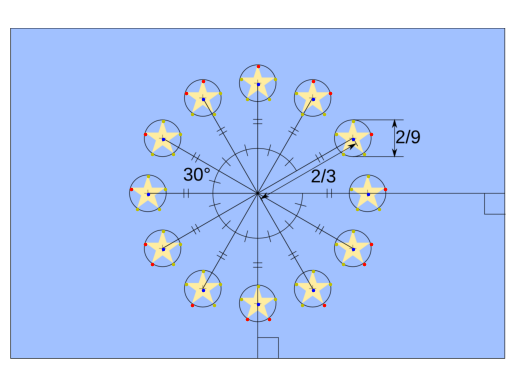

In [4]:
# load EU flag
image = array(Image.open("eu-flag.png"))

# radius
r1 = 2/3*image.shape[0]/2
r2 = 1/9*image.shape[0]/2

# center
x0 = int(image.shape[1]/2)
y0 = int(image.shape[0]/2)

# centers of stars
points1 = [[x0 + r1*cos(pi*i/6), y0 - r1*sin(pi*i/6)] for i in range(12)]
points1 = array(points1)

# spikes of stars
points2 = [[x0 + r1*cos(pi*i/6) + r2*cos(2*pi*j/5 + pi/2), y0 - r1*sin(pi*i/6) - r2*sin(2*pi*j/5 + pi/2)]
           for i in range(12) for j in range(5)]
points2 = array(points2)

# convex polygon
hull = ConvexHull(points2)
points3 = points2[hull.vertices]

# plot
fig, ax = plt.subplots()
ax.imshow(image)
ax.scatter(points1[:,0], points1[:,1], s=2, c='b')
ax.scatter(points2[:,0], points2[:,1], s=2, c='y')
ax.scatter(points3[:,0], points3[:,1], s=2, c='r')
plt.axis('off')
plt.axis('equal')
plt.show()